# Predicting Employee Productivity using Tree Models

In this project I will aim to make use of decision trees and random forests to predict employee productivity in the garment industry. The garment industry is one the largest industries in the 21st century. It is also a highly labour intensive industry, therefore statisfying the huge demand is mostly dependant on the employee productivity and performance. It is highly desirable among decision makers to track and predict the productivity performance of their employees. This project will aim to do just that using the help of random forest and decision tree ML algorithims.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
print(df.shape)

(1197, 15)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Note: the 'wip' column which describes work in progress items has 691 non-null items compared to 1197 with each other column. It is the number of unfinished items for products.

In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


let build a correlation heat map to see the correlation with actual productivity.

In [ ]:
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

Interestingly friday is not in the list of strings, this does not mean the dataframe is wrong it could just be the factory is closed on fridays.

Let's take a look at the department column unique values to see if this column will be useful at all or not.

In [ ]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

We can see that sweing should be respelled to sewing. Also the finishing string has a space so we will replace that so the dataframe is uniform.

In [ ]:
df = df.replace('sweing', 'sewing')
df = df.replace('finishing ', 'finishing')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df['department'].value_counts()

,count
department,
sewing,691
finishing,506


Let's also drop the date column since it won't really be that necessary for our analysis unless offcourse we do analyze productivity by season.

In [ ]:
df.drop('date', axis=1, inplace=True)

Let's examine the quater column a little closely to see if we can alter that column for our analysis.

In [ ]:
df['quarter'].value_counts()

,count
quarter,
Quarter1,360
Quarter2,335
Quarter4,248
Quarter3,210
Quarter5,44


Since we know a qauter is divided into 4 parts, quater 5 is not needed and can be merged with quater 4, and it also has only 44 observations which are insignificant on thier own.

In [ ]:
df.loc[df['quarter'] == 'Quarter5', 'quarter'] = 'Quarter4'
df['quarter'].value_counts()

,count
quarter,
Quarter1,360
Quarter2,335
Quarter4,292
Quarter3,210


Now let's remove the quarter word from the observations and only keep a interger between 1 and 4 for the quarter column

In [ ]:
df['quarter'] = df['quarter'].str.replace('Quarter', '')
df['quarter'] = df['quarter'].astype(int)
print(df['quarter'].dtype)
print(df['quarter'].value_counts())

int64
quarter
1    360
2    335
4    292
3    210
Name: count, dtype: int64


Now lets drop some columns, namely: wip, idle_time, idle_men, no_of_style_change

In [ ]:
df.drop(['wip', 'idle_time', 'idle_men', 'no_of_style_change'], axis=1, inplace=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sewing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500
2,1,sewing,Thursday,11,0.80,11.41,3660,50,30.5,0.800570
3,1,sewing,Thursday,12,0.80,11.41,3660,50,30.5,0.800570
4,1,sewing,Thursday,6,0.80,25.90,1920,50,56.0,0.800382


let's change the no_of_workers column from dtype of of float to int because we cannot have .5 of workers

In [ ]:
df['no_of_workers'] = df['no_of_workers'].astype(int)
df['no_of_workers'].dtype

dtype('int64')

Also let's make the actual productivity column two decimal places like actual productivity to make it uniform

In [ ]:
df['actual_productivity'] = df['actual_productivity'].round(2)
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sewing,Thursday,8,0.80,26.16,7080,98,59,0.94
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89
2,1,sewing,Thursday,11,0.80,11.41,3660,50,30,0.80
3,1,sewing,Thursday,12,0.80,11.41,3660,50,30,0.80
4,1,sewing,Thursday,6,0.80,25.90,1920,50,56,0.80


Now for our classification tree we have to create a new column called classification_productivity that determines if the observation was productive. This will be known when actual_productivity >= targeted_productivity if it is then we label it as productive otherwise as not_productive.

In [ ]:
df['classification_productivity'] = np.where(df['actual_productivity'] >= df['targeted_productivity'], 'productive', 'not_productive')
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,classification_productivity
0,1,sewing,Thursday,8,0.80,26.16,7080,98,59,0.94,productive
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89,productive
2,1,sewing,Thursday,11,0.80,11.41,3660,50,30,0.80,productive
3,1,sewing,Thursday,12,0.80,11.41,3660,50,30,0.80,productive
4,1,sewing,Thursday,6,0.80,25.90,1920,50,56,0.80,productive


In [ ]:
df['classification_productivity'].value_counts(normalize=True)

,proportion
classification_productivity,
productive,0.747703
not_productive,0.252297


Now we can use one hot encoding to create dummy variables to get binary values for each department. Let me first replace the department column to sewing department and make 0 for 'finishing' and 1 for sewing. Then drop the 'qaurter', 'day' and 'team' columns.

In [ ]:
df['department']= df['department'].replace({'finishing':0, 'sewing': 1})
df.rename(columns={'department': 'sewing_dept'}, inplace=True)
df.head()

<ipython-input-19-d397dc489031>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['department']= df['department'].replace({'finishing':0, 'sewing': 1})


,quarter,sewing_dept,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,classification_productivity
0,1,1,Thursday,8,0.80,26.16,7080,98,59,0.94,productive
1,1,0,Thursday,1,0.75,3.94,960,0,8,0.89,productive
2,1,1,Thursday,11,0.80,11.41,3660,50,30,0.80,productive
3,1,1,Thursday,12,0.80,11.41,3660,50,30,0.80,productive
4,1,1,Thursday,6,0.80,25.90,1920,50,56,0.80,productive


In [ ]:
df = pd.get_dummies(df, columns=['quarter', 'day', 'team'], prefix=['q', None, 'team'])
df.head()

,sewing_dept,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,classification_productivity,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,59,0.94,productive,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0.75,3.94,960,0,8,0.89,productive,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0.80,11.41,3660,50,30,0.80,productive,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.80,11.41,3660,50,30,0.80,productive,True,False,...,False,False,False,False,False,False,False,False,False,True
4,1,0.80,25.90,1920,50,56,0.80,productive,True,False,...,False,False,False,True,False,False,False,False,False,False


We are now ready to make and implement our classification tree model!

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df.drop(['actual_productivity', 'classification_productivity'], axis=1)
y = df['classification_productivity']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

Now that we have implemented the model, let's get a score for it and visualize the tree itself and see if we need ti tweak any parameters to get the best score.

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8541666666666666


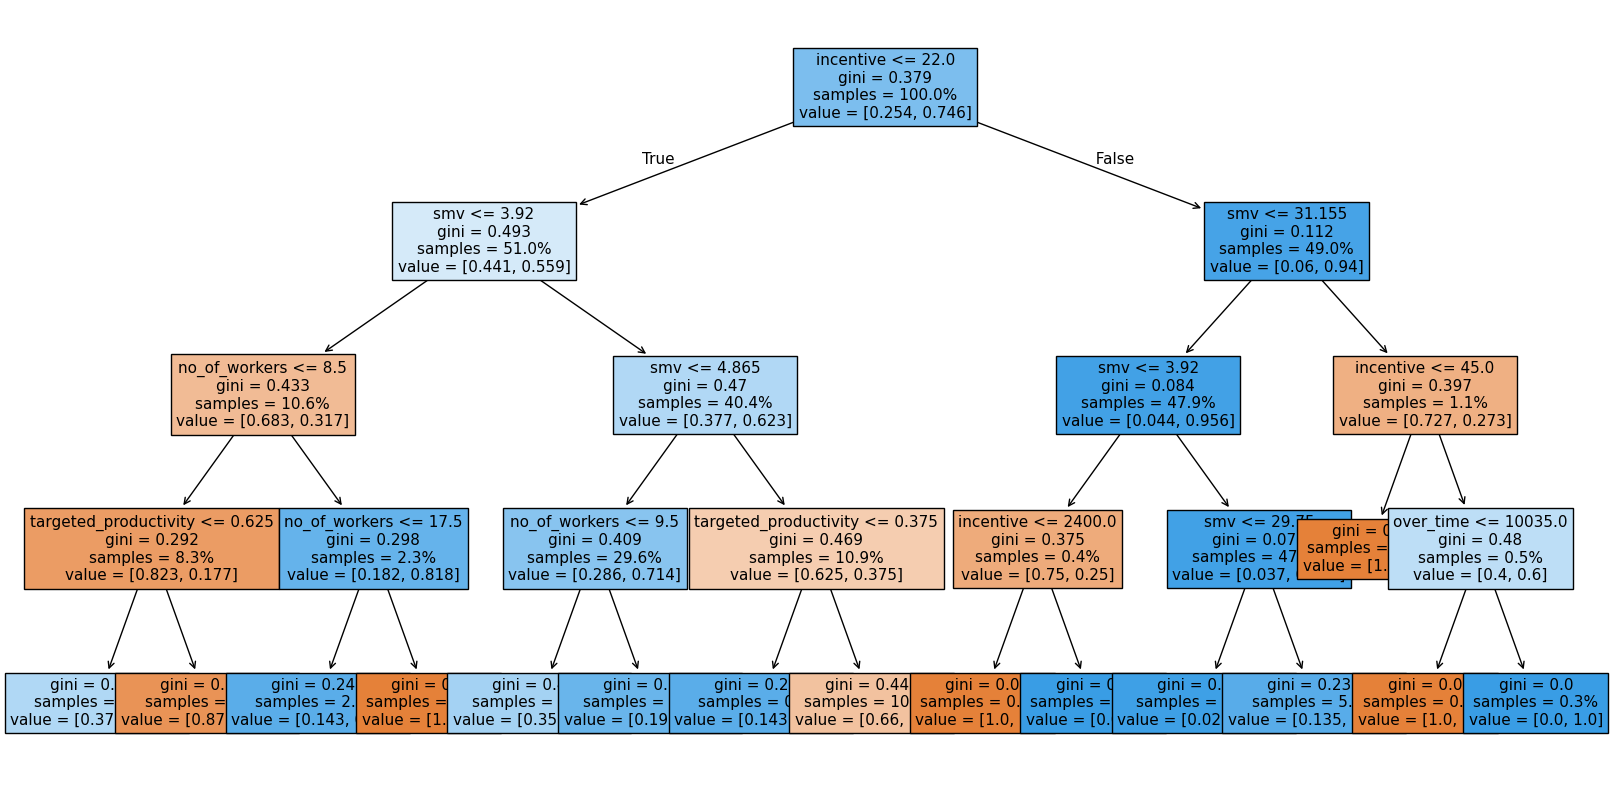

In [ ]:
plt.figure(figsize=(20,10))
_=plot_tree(tree, filled=True, feature_names=X.columns, rounded=False, proportion=True, fontsize=11)
plt.show()

Ok we do see some good results with a accuracy score of ~94% but I think we can do better, because some of the nodes are overlapping in the plot and we need class names too. Let's use GridSearchCV to see the best parameters.

In [ ]:
parameters = {'max_depth' : [2,3,4,5],
              'criterion': ['gini', 'entropy'],
              'class_weight': [None, 'balanced']
              }

tree = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(tree, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 3}
0.8234293193717278
DecisionTreeClassifier(max_depth=3, random_state=42)


Looks like the best paramters are a balanced weight class, with a gini criterion as compared to shannon entropy and a max_depth of 2 levels to prevent overfitting. So let's train the model with these parameters and see how well the tree plot comes out, but I will use three levels so that we do not underfit the data since 2 levels seems a little simplistic.

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced', criterion='gini')
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7125


Cool we got a score of about 71%! Let's plot the tree now.

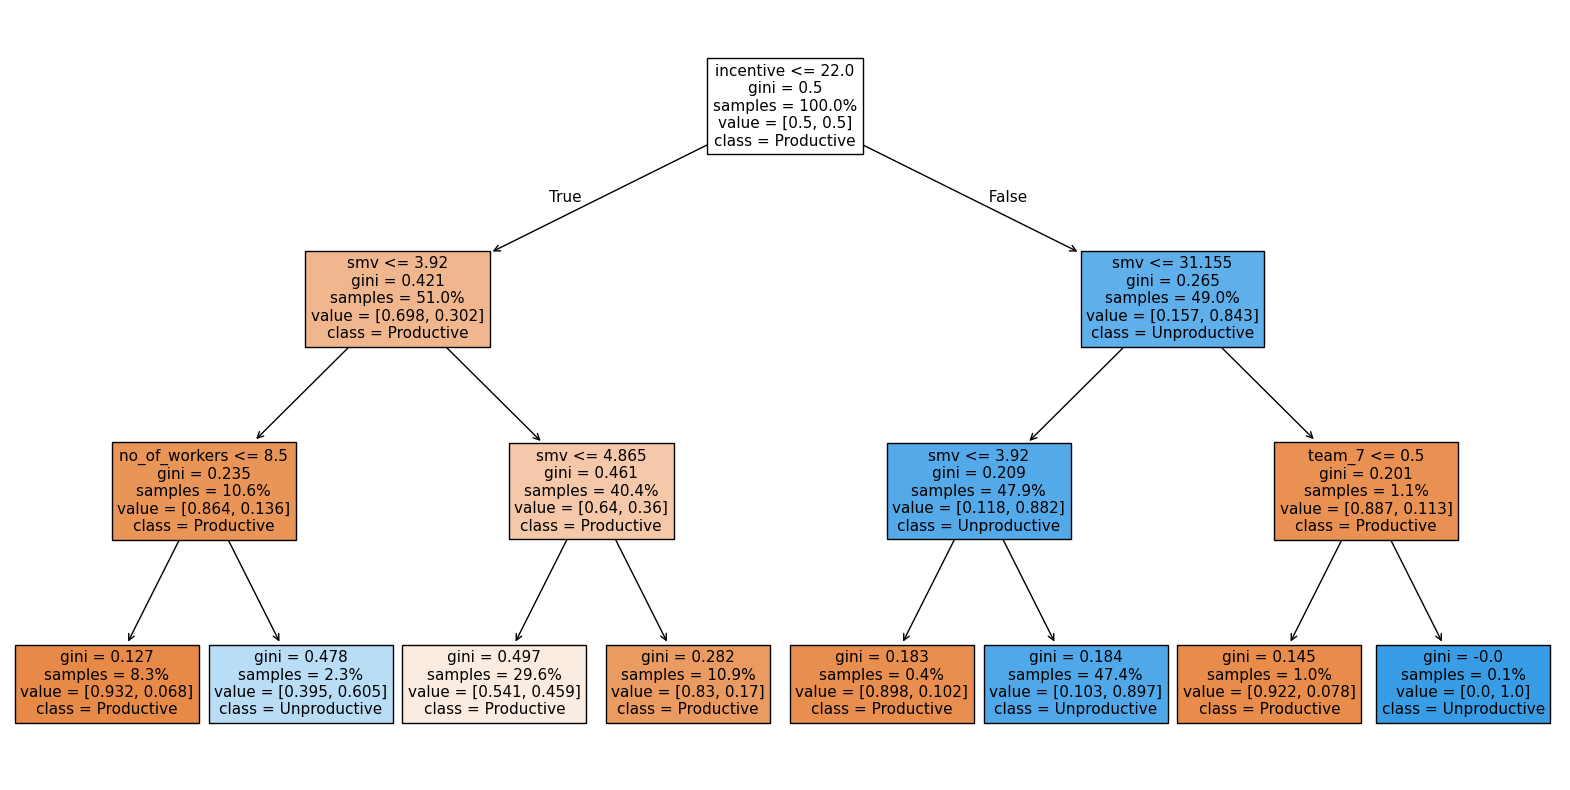

In [ ]:
plt.figure(figsize=(20,10))
_=plot_tree(tree, filled=True, feature_names=X.columns, rounded=False, proportion=True, fontsize=11, class_names=['Productive','Unproductive'])
plt.show()

In [ ]:
feature_imp = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp.head()

,0
incentive,0.657336
smv,0.286436
no_of_workers,0.050692
team_7,0.005536
sewing_dept,0.000000


Ok, so now we got a better a decision tree with no overfitting the data. The root node divides the tree by the incentive with a threshold of <=22.0. This is proven further by the table we generated after the plot called feature_imp, where incentive played the most part in determining the model results, followed by: smv (standard minute value), no_of_workers and team_7.

Let's work out an example: let's say we have an obervation of a team, where the smv = 11.98, incetive = 25 and no_of_workers = 33. Now if look at the root node it gives the threshold of incentive <= 22.0 with a gini_impurity of 0.5 meaning half of the observations are of class 'productive' and the other half is of 'unproductive'. Since 25>22 we move down the false arrow or the right arrow down to the internal node (level 1) where the threshold is smv <= 31.155. We know that 11.98 < 31.155 we down the True arrow (Left arrow). The second internal node (level 2) again uses smv as a threshold marker where smv <= 3.92. We know that 11.98 > 3.92 so we move down the False arrow (Right arrow) and arrive at our leaf node (level 3). Which gives us a class of 'unproductive'. We got a gini impurity value of 0.184 meaning most of our reuslts were in the unproductive class, it was the most popular leaf surprsingly with 47% of the samples belonging to this leaf meaning most observations fell into a this leaf which is classified as unproductive.

Let's use additional scoring metrics using the confusion to see how well the model performed.

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 54,   5],
       [ 64, 117]])

Let's use the confusion matrix which has the True negatives, False Positives, False Negatives and True Positives to calculate the Precision, recall and F1 score.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f'Precision Score :{precision_score(y_test, y_pred, pos_label="productive"):.2f}')
print(f'Recall Score :{recall_score(y_test, y_pred, pos_label="productive"):.2f}')
print(f'F1 Score :{f1_score(y_test, y_pred, pos_label="productive"):.2f}')

Precision Score :0.96
Recall Score :0.65
F1 Score :0.77


The precision score is outstanding at 0.96, the recall score is not that great at 0.65 and F1 score is okay at 0.77. Let's also use the cross validation score to check how well the model performed.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
print(f'Cross Validation Scores: {scores.round(3)}')
print(f'Average Cross Validation Score: {scores.mean():.2f}')

Cross Validation Scores: [0.708 0.65  0.75  0.733 0.65  0.683 0.625 0.706 0.739 0.697]
Average Cross Validation Score: 0.69


Looks like we got a score little below 70% which is not the best but it will do for now. We may need better data or a more robust model to evaluate the data and make even more accurate predictions.

Let's use an ensemble method which uses the average of many decision trees to make a classification, also known as random forests to get a better accuracy score.

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
oobscore = random_forest.oob_score_
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.2f}')
print(f'OOB Score: {oobscore:.2f}')

Accuracy Score: 0.82
OOB Score: 0.84


Looks like the random forest model performed considerably better than a single decision tree model. We got a accuracy score of 82% about 10% higher than the accuracy score for the decision tree model and a Out Of Bag score of 84%. Which is just average of all the predictions of all trees on thier respective OOB data. OOB data being unseen data that was extracted from the sample sets, which therefore provides an estimate of the model's performance on unseen data. This was even better, so we can say confidently that the random forest model perfomed much better with the data than a single decision tree. This may be due a more robust computation of the data (sensitive to noise and outliers), bootstrapping (trained on different random subset of the data) therefore has more diversity so the model can handle new data better, less overfitting, improved generalization. The single decision tree might have overfitted the data, while the ensemble method in random forest handled that, evident in the high OOB score.  

# Conclusion

Looking at the whole anaylsis and the decision tree and random forest models that we used to segregate the productivity of workers in the garment industry, I would say that the model overall did a good job. The decision tree model seemed to deem incentive and standard minute value (SMV) as essential features that determined if worker was prodcutive or not. Since the decision tree seemed to divide the samples of obersvations mostly based on these two features. Although the accuracy score was 71%, which is good but not great, the random forest model seems to pick up on that and gives us much better score of 82%. The OOB score for the random forest was even better at 84%, which may be because the model did not overfit as much, better diversity of trees, and improved generalization. This is even better since the OOB score only considers the model's performance on unseen data, so ambigous or new obervations have a better chance of being predicted correctly. I would say given this if the industry wants to improve productivity of workers, better incentives and better training for a stricter smv would greatly improve productivity.

Some other machine learning models we could consider are:

1. Logistic Regression, since it is a binary classification
2. Support Vector Machines (SVM), since these models are good at handling complex relationships between features, effective between binary classes
3. Gradient Boosting Machines (GBM), ensemble methods that combine weak learners (like decision trees) to create a strong learner
4. Neural Networks, since they handle complex relationships between features in large datasets and are very flexible, but can be computationally expensive

These would great options for further accuracy in predictions!